In [1]:
import numpy as np

# 4. 신경망 학습

좋아 이제 신경망이 뭔지 알았어. 이젠 딥러닝의 꽃인 '학습'에 대해 알아볼거야<br>
학습이란, 훈련(반복적인 계산)을 통해 매개변수를 update해 나가는 과정이야<br>
어제의 sample_weight.pkl 같은 경우는, 이미 학습이 끝난, 매개변수를 이용했던거야<br>
이때 가중치를 수정하기 위해서 '손실 함수' 라는 것을 이용하고, 이 '손실 함수'의 기법 중 함수의 기울기를 활용하는 '경사법'에 대해 알아보자 

### 4.1 데이터를 통해 학습을 해보자

### 4.1.1 데이터 주도 학습

머신러닝의 핵심은 '데이터'야.<br>
사람이 어떤 문제를 해결할때는, 경험과 직관을 단서로 시행착오를 거치면서 일을 해.<br>
예를들면, '키가 180에 몸무게가 80kg인 사람의 성별은?' 이라고 질문을 했을때, 우리는 직관적으로 남자일거라는 예측을 내리잖아<br>
하지만 머신러닝은 사람의 개입을 최소화 하고 데이터로부터 패턴을 찾아내는거기 때문에,<br>
수천명의 사람의 키,몸무게,성별을 갖고 학습을 통해 저 질문에 대한 답을 내려줘<br>
거기다 신경망을 활용한 학습들은 기존의 머신러닝보다 사람의 개입을 더욱 배제시켜주는 특성을 갖고있어<br>

*TMI : Garbage In Garbage Out/ GIGO 쓰레기를 넣으면 쓰레기가 나온다. 데이터과학에서 많이 볼 수 있는 표현이야.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 예쁜 데이터를 넣어줘야 예쁜 결과를 구할 수 있다는 뜻이야

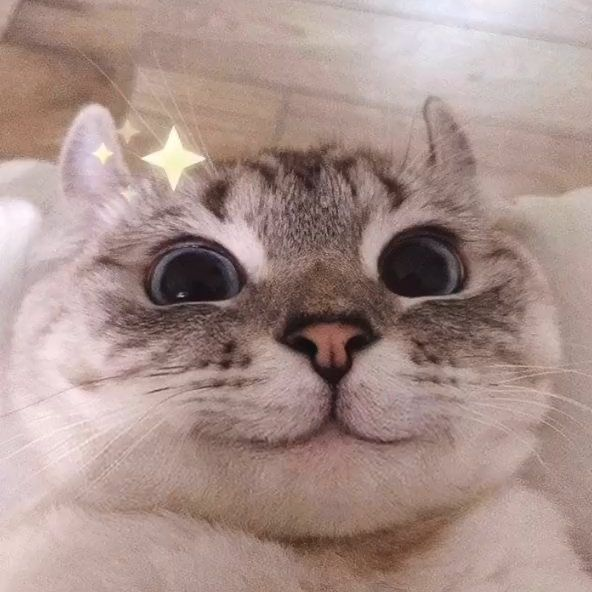

또 하나의 예를 들어보자. 이 동물의 종이 뭐지?<br>
우리 모두가 알아. 얘는 고양이야<br>

자, 이제 동물사진들중에서 고양이를 찾아내는 프로그램을 만들고싶어. 어떻게 해야해?<br>
우리는 얘를 왜 고양이라 그러지? 수염? 귀?<br>
아니, 답을 아는데, 설명이 안되잖아. 고양이도 고양이 품종마다 다르고, 개채마다 특징이 다 다른데, 그걸 어떻게 프로그래밍하지?<br>

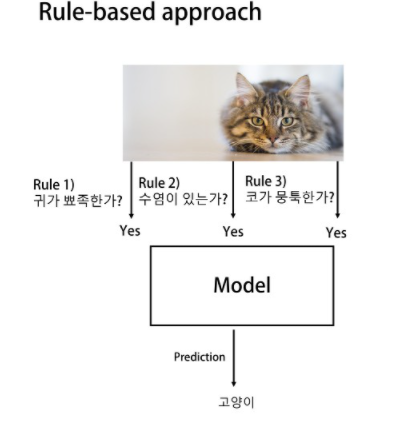

이런건, 알고리즘을 설계하는 대신에, 이미지로부터 <b>'특징'(feature)</b> 을 추출하고, 그 특징의 패턴을 머신러닝 기술로 학습시킬 수 있어.<br>
이런 이미지의 특징같은건, 이미지 데이터를 벡터로 변환하고, 여러 머신러닝 알고리즘을 써서 학습시킬 수 있어 <br>
하지만 이미지를 벡터로 변환하는것은 사람이 해야하고, 적절한 특징을 찾지 못하면 좋지 못한 결과를 얻을 수도 있단말이지<br><br>
이게 사실 <b>딥러닝과 머신러닝을 구별</b>하는 가장 큰 특징인 <b>'feature engineering'</b>이야<br>


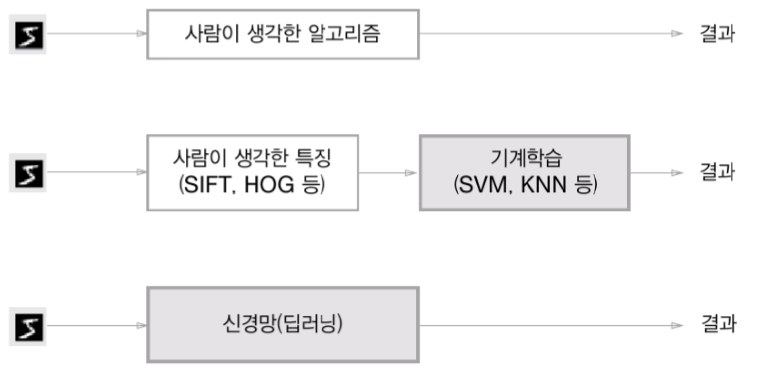

신경망을 이용하면, 이미지를 특징을 추출해서 입력하는것이 아니라, 이미지 그 자체를 학습해.<br>
동물을 인식하건, 숫자를 인식하건, 얼굴을 인식하건, 그냥 받은 데이터 자체를 온전히 받아들여서 여기서 패턴을 찾으려하는거야<br>
그렇기 때문에 신경망은 'end-to-end'로 학습한다고 해

### 4.1.2 훈련데이터와 시험데이터(Training data, Test data)

신경망에 들어가기 전에, 머신러닝은 모델을 개선시킬때 <b>훈련데이터</b> 와 <b>시험데이터</b>로 데이터를 나눠서 학습을 진행해<br>
먼저, 훈련데이터만 사용해서 학습을 쭉~ 진행시켜서 최적을 매개변수를 찾은 다음에, 시험데이터로 내가 만든 모델의 성능을 측정하는거야<br>
이걸 나누는 이유는 <b>'일반적'</b>인 경우에도 모델이 잘 적용 할 수 있게 해주기 위함이야.<br><br>

일반적인 경우란게 뭐냐면, 딱 이렇게 생각하면 되겠다.<br>
우리가 시험을 보는데, 시험문제가 기출문제랑 똑같이만 나오는걸 알면 거기 있는 문제들은 기가막히게 풀고,점수는 잘 나오겠지<br>
근데 그건 문제를 통째로 외운거지 우리가 그 과목을 공부한게 아니잖아. 어디가서 '아 저 공부좀 했어요'라고 말을 못해. '그 시험' 이 아니면 시험을 못봐<br><br>

이래서 같은 데이터셋으로 학습과 평가를 같이하면 공정하게 성능을 평가할 수 없어.<br>
이렇게 한 데이터('기출만 나오는 시험')에만 지나치게 최적화 된 상태를 <b>오버피팅</b>(overfitting) (과적합) 이라고 해

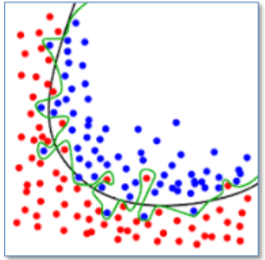

### 4.2 손실함수 (Loss Function)

![](https://drive.google.com/uc?id=1SMxO-SrTzm8-Fq07T_rdkLnukxgPlmuL)

손실함수는, 실제값이랑 예측한값이 얼마나 차이나나요? 를 나타내주는 함수야.<br>
학습이 진행되면서 해당 과정이 얼마나 잘 진행되고 있는지? 의 지표로 활용할 수 있어<br>
손실함수의 결과를 통해 학습 할 파라미터(매개변수)들을 조정을 하고, <b>미분 가능한 함수</b>를 시용해야해<br>
보통 <b>오차제곱합(Sum of Square Error)</b>, <b>크로스 엔트로피 에러(Cross Entropy Error)</b>를 이용해

### 4.2.1 오차제곱합(Sum of Square Error)
- Mean Squared Error
- Root Mean Square

<font size = '5em'><center>$ E = {{1}\over{2}} \sum_k (y_k -t_k)^2 $</center></font>

$y_k $ 는 신경망의 출력(예측한 값) 이고, $t_k$는 찐정답 레이블이야. $k$ 는 데이터의 차원 수를 나타내<br>
예를들어 MNIST 데이터를 보면 $y_k$, $t_k$는 숫자 10개를 구별하는거라 10개의 데이터를 갖고있는거야

In [262]:
y1 = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])      #2라고 예측
y2 = np.array([0.1, 0.01, 0.1, 0.0, 0.01, 0.01, 0.01, 0.8, 0.01, 0.05])  #7이라고 예측
t = np.array([0,0,1,0,0,0,0,0,0,0])

위에 숫자들을 보면<br><center>
y1[0] : 0일 확률이 0.1,<br>
y1[1]: 1일 확률이 0.05,<br>
y1[2] : 2일 확률이 0.6<br></center>
이런 식으로 쭉 진행되는거고,t[2] = 1이니까 정답은 2라는 뜻이야.<br>y는 소프트맥스 함수의 출력이라고 생각해두자.<br>
이렇게 정답 하나만 1로 표시해주는걸 원핫 인코딩이라 했었지?

In [263]:
# 오차 제곱합의 구현

def sum_of_square_error(y,t):
    return 0.5 * (np.sum((y-t)**2))

In [264]:
sum_of_square_error(y1,t)

0.09750000000000003

In [265]:
sum_of_square_error(y2,t)

0.7315

정답이 2인데 y1은 2일 확률이 가장 높아! 라고 얘기했고, y2는 7이 제일 높아! 라고 얘기했을때,<br>
오차제곱합이 y1에서 더 적게 나오는걸로 봐서 y1이 정답에 좀 더 가깝다고 판단 할 수 있어

### 4.2.2 크로스 엔트로피 에러

<font size = '5em'>
<center>$E = -\sum_k t_k \log y_k $</center></font>

$\log$는 자연로그, $y_k$는 예측한 아웃풋, $t_k$는 정답레이블이야. 여기서도 $t_k$는 원핫인코딩이고.<br>
좀 뜬금없는 식일 수 있으니까 하나 하나 그래프로 살펴보자

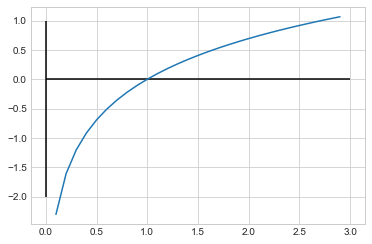

In [266]:
# log의 그래프

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
x = np.arange(0.1,3,0.1)
y = np.log(x)

plt.plot(x,y)
plt.vlines(0,-2,1)
plt.hlines(0,0,3)
plt.show()

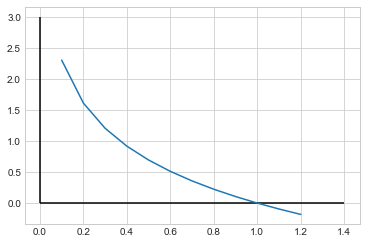

In [267]:
#-log의 그래프

x = np.arange(0.1,1.3,0.1)
y = -np.log(x)

plt.plot(x,y)
plt.vlines(0,0,3)
plt.hlines(0,0,1.4)
plt.show()

<font size = '5em'> <center>$E = -\sum_k t_k \log y_k $</center></font>

자 잘봐. 공식이 왜 이렇게 나오나 설명해줄게<br>
* $\log x$는 $x$가 1에 가까워질수록 결과가 0에 가까워진다 $\rightarrow$ 정답인 1에 가까울수록 오차가 0에 가까워진다<br>
* $t_k$ : 정답만 1이고 나머지는 0이다 $\rightarrow$ 정답에 해당하는 애의 $\log$값만 취한다<br>
* 우리의 목표는 E가 작아지는건데 $\log$함수는 0~1일때 음수다 $\rightarrow$ 앞에 $-$를 붙여 "$E$가 작을 수록 좋은 손실함수다"라는 개념이 유효하게 해준다

지금처럼 원핫인코딩을 쓰면, 정답이 아닌애는 쳐다보지도 않을꺼야! 라고 생각해도 될거같아<br>
조금 설명이 됐으려나? 바로 구현해보자

In [268]:
def cross_entropy_error(true_y,pred_y):
    delta = 1e-7
    return - np.dot(true_y,np.log(pred_y + delta))

In [269]:
a = np.array([[2,3,4],[3,2,1]])
a.ndim

2

delta 를 붙여준 이유는 log는 0일때 값을 계산할 수 없기 떄문이야!

In [270]:
cross_entropy_error(y1,t)

6.447238200383332

In [271]:
cross_entropy_error(y2,t)

16.11809564095832

얘도 y1의 결과가 y2값보다 더 작지? 결과는 오차제곱합이랑 교차엔트로피합이랑 똑같아!

### 4.2.3 미니배치


지금 우리는 y1, 혹은 y2 라는 데이터 하나에 대한 손실함수를 봤잖아?<br>
예를들어, $y_1 \sim y_{100}$ 이면, 이 100개의 손실함수를 다 더해준게 내 최종적인 손실함수야.<br>
데이터가 N개 있을때의 크로스 엔트로피 에러에 대해서 수식으로 쓰면 다음과 같아<br><br>
<font size = '5em'>
<center>
$E = -{{1}\over{N}} \sum _n \sum _k t_{nk} \log y_{nk}$
</center>
    </font>
* N은 전체 데이터 개수<br>
* $ y_{nk}, t_{nk} $는 n번째 데이터의 k번째 값.
<br><br>

N으로 나눠주는 이유는 '평균 손실함수'를 구해주기 위해서야. 그러면 데이터의 개수와 관련없이 하나의 '지표'로 활용 가능하니까

근데 딥러닝을 학습시킬땐 데이터가 많이 필요하단 말이지. 좀 많아. 많아 정말<br>
MNIST의 경우만 봐도 훈련데이터가 60,000개나 있어. 데이터가 커질수록 손실함수의 합을 구하는데 시간도 오래거리고, 값도 너무 커져<br>
이럴때는 데이터에서 일부분의 데이터만 뽑아내 그걸 전체의 '근사치'로 활용하는거야<br>
신경망에서 학습할때도 훈련데이터에서 일부만 골라서 학습을 시켜. 이걸 <b>미니배치</b>라고 해.<br>
6만장 중에서 100장만 뽑아서 보자! 라는거야.



#### MNIST 불러오기 

In [272]:
import numpy as np
import tensorflow as tf

In [273]:
#flatten을 위한 함수

def flatten_for_mnist(x):
    temp = np.zeros((x.shape[0],x[0].size))
    
    for idx,data in enumerate(x):
        temp[idx][:] = data.flatten()
        #temp[idx,:] = data.flatten()
        
    return temp

In [274]:
#mnist 불러오기
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#정규화(0~1사이의 값으로 만들어주기)
x_train,x_test = x_train/255.0 , x_test/255.0

#평탄화(28*28을 784로)
x_train = flatten_for_mnist(x_train)
x_test = flatten_for_mnist(x_test)

#원핫인코딩
y_train = tf.one_hot(y_train,depth = 10).numpy()
y_test = tf.one_hot(y_test, depth = 10).numpy()

print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


데이터를 전부 다 쓰는 문제에 대해 얘기하고 있었으니까, 무작위로 10장만 빼낸다고 보자. 넘파이의 random.choice() 함수를 사용할거야

In [275]:
#10개를 무작위로 추출해서 
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)
x_batch = x_train[batch_mask]
y_batch = y_train[batch_mask]

In [276]:
x_batch

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [288]:
print('x_batch.shape',x_batch.shape)
print('x_batch.size',x_batch.size)

x_batch.shape (10, 784)
x_batch.size 7840


In [277]:
y_batch

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [289]:
print('y_batch.shape',y_batch.shape)
print('y_batch.size',y_batch.size)

y_batch.shape (10, 10)
y_batch.size 100


In [290]:
y_batch.ndim

2

<center>choice 함수는 뭐가 들어가나?</center>

np.random.choice()는 이런 구조로 생겼어. a에 내가 원하는 크기를 넣어주고(넣어준 숫자는 해당 안돼 1000을 넣으면 999까지야),<br>
size에 몇개를 추출할껀지 써줘.

In [278]:
np.random.choice(1000)

554

In [279]:
np.random.choice(1000,10)

array([498,   2, 948, 964, 771, 696, 372,  42, 257, 317])

### 4.2.4 배치를 위한 크로스 엔트로피 에러

y = 예측값 [0.1,0.2,0.1,0.05,0.05,0.6,0.1]
6만개(혹은 batch_size만큼)
t = 실제값 [0,0,0,0,0,0,1,0,0]
6만개(혹은 batch_size만큼)

In [281]:
def cross_entropy_error(y,t):
    if y.ndim ==1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.dot(t,np.log(y + 1e-7)) / batch_size

#     정답이 원핫인코딩이 아니라 '2','7' 등의 숫자로 되어있을 경우  
#     return -np.sum(np.log(y[np.arange(batch_size),t] + 1e-7)) / batch_size

In [325]:
a = np.array([1,2,3])
print(a.ndim)
print(a.reshape(1,a.size))
print(a.reshape(1,a.size).ndim)

1
[[1 2 3]]
2


In [326]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a.reshape(1,a.size)
a.shape

(3, 3)

In [287]:
a = x_batch
print('a 그 자체 :',a)
print('x배치 크기 :',a.size)
print('x배치 모양 :',a.shape)
a = x_batch.reshape(1,x_batch.size)
print('reshape 한 a:',a)
print('x배치를 reshape한 크기 :',a.size)
print('x배치를 reshape한 모양 :',a.shape)
print('')

b = y_batch
print(b)
print('y배치 크기 :',b.size)
print('y배치 모양 :',b.shape)
b = y_batch.reshape(1,y_batch.size)
print(b)
print('y배치를 reshape한 크기 :',b.size)
print('y배치를 reshape한 모양 :',b.shape)

a 그 자체 : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
x배치 크기 : 7840
x배치 모양 : (10, 784)
reshape 한 a: [[0. 0. 0. ... 0. 0. 0.]]
x배치를 reshape한 크기 : 7840
x배치를 reshape한 모양 : (1, 7840)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
y배치 크기 : 100
y배치 모양 : (10, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0.]]
y배치를 reshape한 크기 : 100
y배치를 reshape

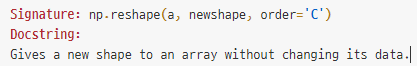

지금 reshape를 통해 다 한줄로 변경해줬어.<br>
아까 크로스 엔트로피 에러는 '정답인 애만 찾아줘서 계산할거야'라고 얘기했었지?<br>
이제 정답에만 맞는 값을 구해줘서 크로스 엔트로피 에러를 계산하고,<br>
배치의 크기로 나눠서 이미지 1장당의 평균 크로스 엔트로피 에러를 구해주는거야

np.log(y[np.arange(batch_size),t]) 에 대한 얘기를 간한다게 하면,<br>
np.arange(batch_size)로 0 ~ (batch_size -1) 까지의 배열을 생성해줘<br>
예를들어 배치크기가 5면 np.array[0,1,2,3,4] 가 생기는거야.<br>
그담에 t에는 뭐 [2,7,0,9,5]로 정답레이블이 저장돼있으면,<br>
y[np.arange(batch_size),t]를 통해 각 데이터의 정답레이블에 해당하는 신경망의 출력을 추출하는거야<br>
그러면 결과가 y[0,2],y[1,7],y[2,0],y[3,9],y[4,5] 이런식으로 생기는거지.

### 4.2.5 손실함수를 사용하는 이유

여태까지 손실함수들에 대한 얘기들을 해봤는데, 왜 "굳이" 이렇게 손실함수를 써서 차이를 지표로 모델을 개선하는걸까?<br>
우리 목표는 얼마나 잘 하는지, "정확도" 아닌가? 정확도를 지표로 삼아서, 실행했을 때 정확도가 낮으면 개선하게 처음부터 짜면 되는거 아니야?<br><br>

정확도는 매개변수의 변화에 엄청 둔감해! 그리고 예전부터 '미분' 얘기를 할 수 밖에 없는데,<br>
손실함수를 쓰면 미분값을 통해 변화를 어떻게 줘야할지 아는데, 정확도를 수치로 사용하면 그걸 파악하기 힘들어져.

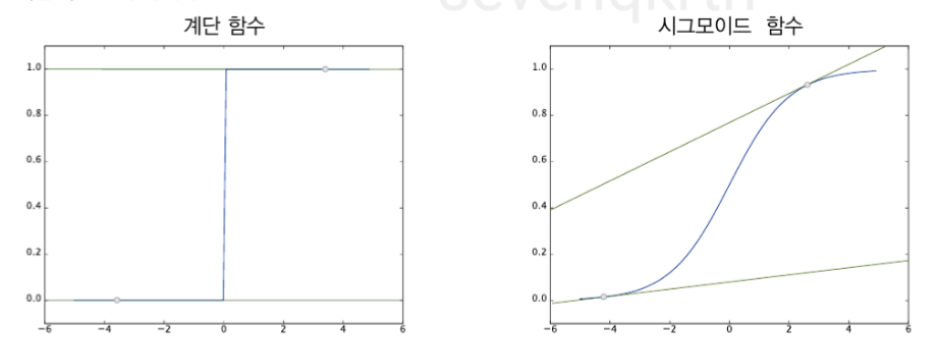

계단함수를 활성화 함수로 사용하지 않는것도 비슷한 이유야. 시그모이드 함수는 어떤 점을 보더라도 미분할 수 있는데,<br>
계단함수는 그런게 없거든. 그래서 학습을 못해

### 4.3 수치미분

자꾸 미분 얘기 나오고, 이제 막 기울기 얘기 나오고 하는데, 먼저 딥러닝이란게 무슨 느낌인지 이제는 한번 얘기를 하고 넘어갈게.<br><br>
<center><h2>딥러닝을 왜 쓸까..? 왜 떳을까?</h2></center>

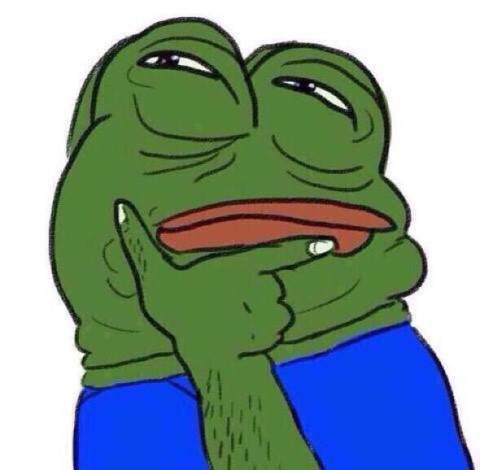

수학문제를 푸는데 딥러닝을 활용하지는 않아. 기존의 공식으로 푸는게 훨씬 더 효율적이니까.<br>
딥러닝은 또 굉장히 비효율적이야. 진짜 단순무식하게 데이터를 때려넣어서 찾아내겠다는거거든.<br>
그래서 데이터도 어마어마하게 필요하고, 장비의 연산도 무조건 좋은게 좋아<br>
그럼에도 이 시대는 딥러닝에 정말 미쳐있단말이지<br><br>

나도 지식이 짧지만, 내가 여태까지 이해한 바로는 '관계가 존재하는데, 말로 설명할 수 없는' 것들에 대한 해답을 얻기 위해<br>
인간의 사고를 모방한 딥러닝이 활용된다고 생각해. 그 결과가 그만한 가치가 있기 때문에 위의 비효율을 다 감수하는거 아닐까?<br>
이 말을 하는 요지가 뭐냐, '관계가 존재한다'에 초점이 있다고 봐.<br><br>

어디서 봤는지는 모르겠는데, 딥러닝은 맹인이 지팡이를 짚고 땅을 걷는 느낌이다. 라고 누가 그랬었어.

![](https://upload.wikimedia.org/wikipedia/commons/e/e3/Non-Convex_Objective_Function.gif)

이런 산이 있을때, 우린 지팡이 하나만 의지한채 제일 낮은 곳으로 가고 싶은거야.<br>
이때 필요한게 <font size = '4em'><b>기울기</b></font>고, 그걸 위해 <font size = '4em'><b>미분</b></font>을 해야해

### 4.3.1 미분

뭐, 다 미분이 뭔진 알겠지만, 그래도 개념정리 한번 하고 갈게

미분은, 변화'율'이야. 얼마나 변했니? 를 물어보는거야. 근데 그게 '잠깐!!!' 동안 얼마나 변할까?를 물어보는건거지<br>
수식으로 쓰면 다음과 같아<br><br>
<font size = '5em'>
<center>
    ${{df(x)}\over{dx}} = \lim_{h\to0} {{f(x+h) - f(x)}\over{h}}$
<center>
</font>

이때 수학에선, $\epsilon$ (입실론)인가 그래서 h가 0은 아닌데 입실론보다 큰 수는 없고 뭐 하여튼 그런게 있는데<br>
이런 논리적인 방법으로 미분하는 과정은 <b>해석미분</b>이라고 해.<br>
하지만 우리는 계산을 컴퓨터로 할거고, 컴퓨터로는 엄밀한 수학적인 미분을 할 수 없기 떄문에 그냥 h를 '작은숫자' 정도로만 만들어줄꺼야<br>
이걸 수치미분이라그래

$2.45 * 10^ -5$

0.0000245

In [44]:
#수치미분 구현

def numerical_diff(f,x):
    h = 1e-5
    return (f(x+h)-f(x))/h

여기서 h = 1e-7 로 설정한 이유는, h가 너무 작아지면 컴퓨터가 그냥 0으로 받아들여서 계산이 불가능해져<br>
물론, 굳이 한다면야 더 인식하게 해서 할 수 있게 해줄 수는 있는데, float64는 float32에 비해 메모리를 2배로 많이 필요로 하고,<br>
float32도  -3.4 x 10^38 ~ 3.4 x 10^38 의 큰 범위를 감당하는 형식이라 그냥 적당한 값을 취해주는거야

In [50]:
h = 1e-100
print(np.float32(h))
print(np.float64(h))

0.0
1e-100


아 근데 위에 구현한 방법으론 문제가 있는데, 우리가 실제로 미분한게 아니라 근사치를 구한거잖아?<br>
그래서 아래와 같은 오차가 존재해

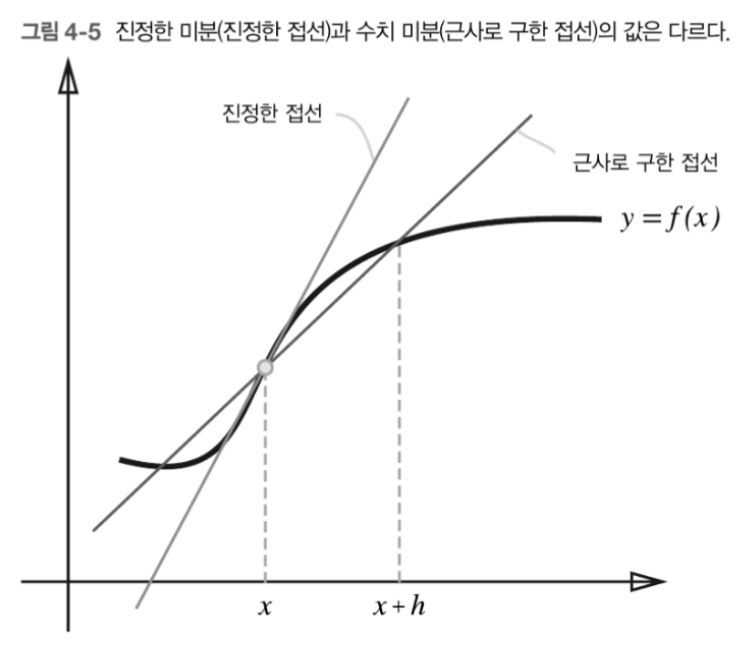

이걸 해결하기 위해서 중앙차분 이란 방법을 이용할꺼야. 우리가 지금 x와 x+h에 대한 차이를 구한거잖아?<br>
여기다 x-h와 x의 차이를 구해서 그 둘의 차이의 평균을 이용하는 방법이야.<br><br>
이걸로 다시 구현해보자

In [51]:
def numerical_diff(f,x):
    h = 1e-7
    return (f(x+h) - f(x-h)) / (2*h)

<center><font size = '4em'>$({{f(x+h) - f(x)}\over{h}} + {{f(x) - f(x-h)}\over{h}}) \div 2 = {{f(x+h) - f(x-h)}\over{2h}}$</font></center>
<br><br>

예제를 통해 확인해보자

In [213]:
def quad_function(x):
    return x**2 + x

이 식을 미분하면 2x+1 인걸 우리는 알아. 

In [214]:
f = quad_function

def diff(x):
    return 2*x + 1

print(f(5))
print(numerical_diff(f,5))
print(diff(5))

30
11.00000003972923
11


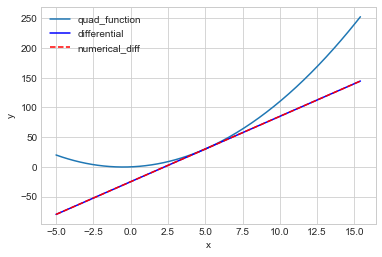

In [215]:
x = np.arange(-5,15.5,0.1)
y = quad_function(x)
y1 = diff(5)*(x-5) + 30
y2 = numerical_diff(f,5)*(x-5) + 30
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x,y,label = 'quad_function')
plt.plot(x,y1,c = 'b', label= 'differential')
plt.plot(x,y2,c = 'r' ,ls = '--', label = 'numerical_diff')

plt.legend()
plt.show()

### 4.3.3 편미분

지금 위의 함수들은, 변수가 x하나에 대한 y값을 보여주는 단일 변수였잖아.<br>
하지만 변수의 개수는 설정하기 나름이고, 변수의 개수가 많아지면 다른 방법으로 미분해야해<br><br>
<center><font size = '4em'>$f(x_0 , x_1 )  =  x_0 ^2 + x_1 ^2$</font></center>

위와 같은 함수를 파이썬으로 구현을 해보자

In [300]:
def function2(x):
    return x[0] **2 + x[1] **2

이걸 그리면 다음과 같은 형태로 나와

![](https://www.researchgate.net/publication/275069197/figure/fig8/AS:324418665500689@1454358845613/Sphere-function-D-2.png)

이런 상황에서 미분할때는, $x_0$에 대한 변화율을 볼건지, $x_1$에 대한 변화율을 볼건지 구별해서 봐야해.<br>
이렇게 하나씩 보는 미분을 <b>편미분</b> 이라고 해. 수식으로는 ${{\partial f}\over{\partial x_{0}}}$, ${{\partial f}\over{\partial x_{1}}}$ 와 같은 형태로 써

위의 함수 $x_0 ^2 + x_1 ^2$ 가 $x_0$ = 3, $x_1$ = 4일때, $x_0$에 대한 편미분 ${{\partial f}\over {\partial x_0}}$ 를 구해보자

In [104]:
def function_tmp1(x0):
    return x0*x0 + 4.0 **2

numerical_diff(function_tmp1, 3.0)

5.999999981298743

이번엔 $x_1$ 에 대한 편미분을 구해보면,

In [105]:
def function_tmp2(x1):
    return 3.0 **2 + x1*x1

numerical_diff(function_tmp2,4.0)

8.000000004670937

자, 해석적 미분과 수치미분의 값이 굉장히 유사한걸 확인 할 수 있었어.<br>
여태 한거처럼, 편미분은 '뭐에대한' 변화율을 볼건지 고정을 하고, 어떤 한 변수에 대한 변화율만을 지켜봐줘.<br>
고정시켜주기 위해서, 임시적으로 새로운 함수(function_tmp)를 설정해
서 확인한거야

### 4.4 기울기

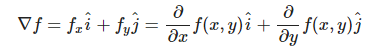

방향과 크기를 갖는 수학적 표현

편미분을 이제 어떻게 하는지 알았잖아? 이렇게 $x_0, x_1$이 결정됐을때 이 종합적인 값 (${{\partial f} \over {\partial x_0}}, {{\partial f} \over {\partial x_1}}$) 를 기울기(gradient) 라 하고,<br>위의 공식에서 보이듯이, 그라디언트값은 <b>벡터</b>로 나타나<br>
파이썬으로는 다음과 같이 나타낼 수 있어

In [309]:
x = [3,4]
print(function2(x))
x[0] = 3.1
print(x)
print(function2(x))
fxh1 = function2(x)
print('')
x[0] = 2.9
fxh2 = function2(x)
print(x)
print(fxh2)

h = 0.1
(fxh1 - fxh2) / (2*h)

25
[3.1, 4]
25.61

[2.9, 4]
24.41


5.9999999999999964

In [ ]:
f = x_0 + x_1**2 + sin(x3) + 2*x4
x = [1,5,3,2]

In [310]:
def numerical_gradient(f,x):
    h = 1e-4
    #x의 형태로 빈 공간을 만들어줘
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx] #예를들면 tmp_val에 0번째 x값....n번째 x 값을 넣어주는거야
        
        #f(x+h) 부분
        x[idx] = tmp_val + h #넣어준 값에 
        fxh1 = f(x)
        
        #f(x-h) 부분
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [311]:
#다 출력해서 확인해보자

def numerical_gradient1(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    print('x.size :',x.size)
    for idx in range(x.size):
        tmp_val = x[idx]
        print('x[idx] :', x[idx])
        
        print('')
        print('#(x+h) 부분')
        x[idx] = tmp_val + h
        print('x[idx]에 들어가는 값 :',tmp_val + h)
        fxh1 = f(x)
        print(fxh1)
        
        print('')
        print('#f(x-h) 부분')
        x[idx] = tmp_val - h
        print('x[idx]에 들어가는 값 :',tmp_val - h)
        fxh2 = f(x)
        print(fxh2)
        
        print('')
        print('중앙차분')
        grad[idx] = (fxh1 - fxh2) / (2*h)
        print('grad에 새로 입력된 값 :',grad[idx])
        x[idx] = tmp_val
        print('tmp_val 초기화 :',tmp_val)
        print('')
        print('grad 출력 :',grad)
    return grad

In [225]:
numerical_gradient1(function2,np.array([3.0,4.0]))

x.size : 2
x[idx] : 3.0

#(x+h) 부분
x[idx]에 들어가는 값 : 3.0001
25.00060001

#f(x-h) 부분
x[idx]에 들어가는 값 : 2.9999
24.99940001

중앙차분
grad에 새로 입력된 값 : 6.00000000000378
tmp_val 초기화 : 3.0

grad 출력 : [6. 0.]
x[idx] : 4.0

#(x+h) 부분
x[idx]에 들어가는 값 : 4.0001
25.00080001

#f(x-h) 부분
x[idx]에 들어가는 값 : 3.9999
24.99920001

중앙차분
grad에 새로 입력된 값 : 7.999999999999119
tmp_val 초기화 : 4.0

grad 출력 : [6. 8.]


array([6., 8.])

In [129]:
print("(3,4) 일때의 기울기 :",numerical_gradient(function2,np.array([3.0,4.0])))
print('(0,2) 일때의 기울기 :',numerical_gradient(function2,np.array([0.0,2.0])))
print('(1,2) 일때의 기울기 :',numerical_gradient(function2,np.array([1.0,2.0])))

(3,4) 일때의 기울기 : [6. 8.]
(0,2) 일때의 기울기 : [0. 4.]
(1,2) 일때의 기울기 : [2. 4.]


기울기를 눈으로 보면 다음과 같아

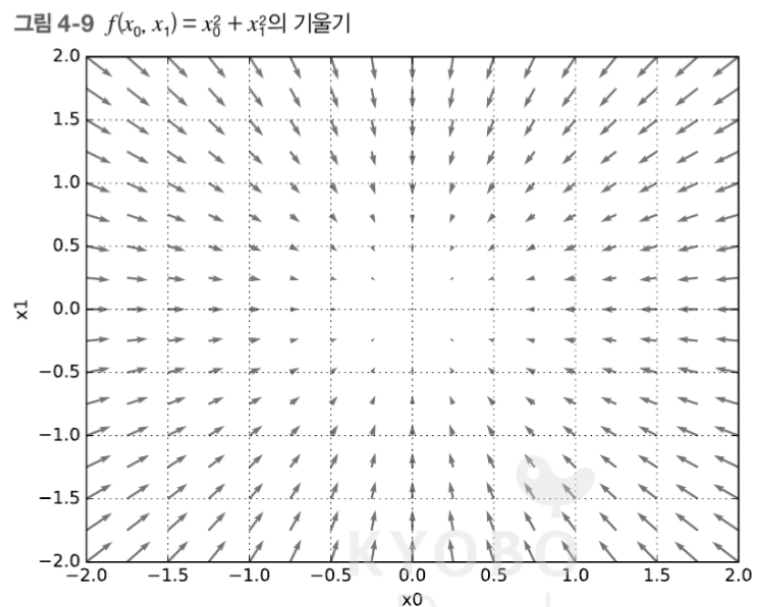

여기서, 기울기가 가르키는 방향으로 갈 수록 함수의 출력을 줄이는거야!<br>
지금 이 함수같은경우, 오목하게 파인 형태이기 때문에 한곳으로만 모이지만,<br>
"각 장소에서" 함수의 출력을 줄이는 방향이라는거 기억하라구

### 4.4.1 경사하강법 (Gradient Descent)

결국에 우리의 목표는 정답과 제일 가까운 최적의 매개변수(가중치와 편향)를 찾는거야<br>
최적이란, 손실함수의 값이 가장 작게 나올때의 상황이고.<br><br>
하지만 매개변수도 엄청 많고, 손실함수 문제는 복잡하기 때문에, 아까 말한거처럼. 지금 상황에서 내가 할 수 있는 최선의 선택(장님의 지팡이)을 통해서 <br>
어디가 최솟값일지를 짐작하는거야. 이때 기울기를 통해 최솟값을 찾으려는 기법의 이름이 <b>경사하강법</b>이야

![](https://upload.wikimedia.org/wikipedia/commons/e/e3/Non-Convex_Objective_Function.gif)

<center>극소값은 최솟값이 아니다</center>

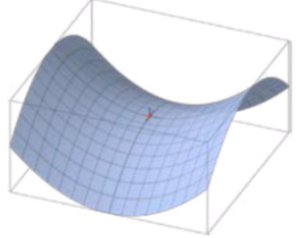

<center> 안장점 문제 또한 존재한다</center>

기울기가 낮아지는곳을 향해 가면, 값이 작아지는건 맞아. 하지만 그 값이 우리가 찾는 '최솟값'(가장 작은값)이라는 보장은 없어.<br>
하지만 어떡해, 우리가 아는게 없는걸. 말했잖아 우린 지팡이 하나만 들고있는 장님이라고.<br>
지팡이를 두들겨서, 낮은곳을 찾아서, 뭐 예를들면 3발짝을 가보자.<br>
그다음에 그곳에서 또 지팡이를 짚고, 가장 낮은 곳을 찾아서, 3발짝을 걸어가면서<br>
가장 낮은 곳을 찾아보는거야.<br><br><br>

이걸, 공식으로 쓰면!

<center>
<font size = '4em'>$x_{n} = x_{n-1} - \eta{{\partial f}\over{\partial x}}$</font>
</center>

위에서 지팡이 짚고 걸어가는 예시로 들면, $x_n$은 지금 내가 있는 좌표야 <br>
$\eta$는 에타 라고 읽고, 학습률(learning rate : lr)이라 그래. 한번에 얼마나 학습할지를 결정하는거야. 우리 예시에서의 3발자국이야<br>
뒤에 나오는건, 기울기야.<br>

방금 본 저 공식은 '1회'에 해당하는 갱신이고,<br>
이걸 계속 반복해서, 점점 낮은곳을 향해 가는거야(함수의 값을 줄이는거야)<br>
이떄 우리의 목표는, f(x)의 값이 변하지 않을때까지(미분값이 0일때까지) 계속해보는게 목표인데, 무한정 할 수는 없잖아?<br>
그래서 반복횟수(epoch, iteration) 또한 설정을 해주게 돼<br><br>


이때, 학습률은 0.01 이나, 0.001 등으로 미리 설정해두고, <br>
이 값이 너무 크냐, 작냐에 따라서 '좋은 장소' 를 찾아갈 수 없기 때문에, 이를 변경하면서 올바르게 학습하고 있는지를 확인 할 수 있어.<br>
파이썬으로 구현하면 다음과 같아

In [167]:
#기본꼴
def gradient_descent(f, init_x, lr=0.01, epoch = 100):
    x = init_x
    
    for i in range(epoch):
        grad = numerical_gradient(f,x)
        x -= lr * grad
    return x

![](https://thumbs.gfycat.com/AngryInconsequentialDiplodocus-size_restricted.gif)

f는 미분하고자 하는 함수,<br>
init_x는 x의 초깃값,<br>
lr은 학습률(learning rate),<br>
epoch은 반복횟수를 의미해

$f_1(x) = x^2$ 일때의 경사하강법을 눈으로 보자

In [327]:
def f1(x):
    return x**2

def df_dx1(x):
    return 2*x

In [339]:
def gradient_descent(f,df_dx,init_x,lr=0.01 ,epoch = 100):
    x = init_x
    x_log, y_log = [x],[f(x)]

    for i in range(epoch):
        grad = df_dx(x)
        x -= lr * grad

        x_log.append(x)
        y_log.append(f(x))

    return x_log, y_log

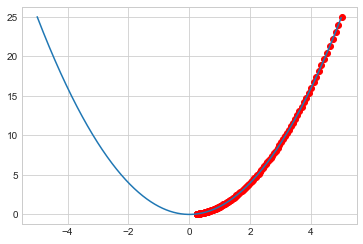

In [341]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

init_x = 5
x_log, y_log = gradient_descent(f1, df_dx1,init_x, lr = 0.01, epoch=150)
plt.scatter(x_log,y_log, color = 'r')

x = np.arange(-5,5,0.01)
plt.plot(x,f1(x))
plt.show()

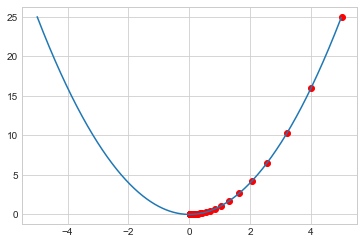

In [342]:
init_x = 5
x_log, y_log = gradient_descent(f1,df_dx1,init_x,lr = 0.1,epoch=30)
plt.scatter(x_log,y_log, color = 'r')

x = np.arange(-5,5,0.01)
plt.plot(x,f1(x))
plt.show()

학습률을 0.01에서 0.1로 조정하니까 위에서 에폭이 100이여도 0에 도달하지 못한걸 30번도 안돼서 도달한 걸 볼 수 있어

$f_2 (x)= 0.01x^4 −0.3x^3−1.0x+10.0$ 일때의 경사하강법

In [182]:
def f2(x):
    return 0.01*x**4 - 0.3*x**3 - 1.0*x + 10.0

def df_dx2(x):
    return 0.04*x**3 - 0.9*x**2 - 1.0

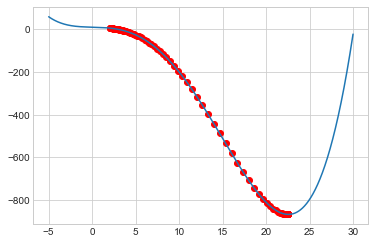

In [192]:
init_x = 2
x_log, y_log = gradient_descent(f2,df_dx2, init_x,epoch=100)
plt.scatter(x_log,y_log, color = 'r')

x = np.arange(-5,30,0.01)
plt.plot(x,f2(x))
plt.show()

#### Global minimum vs Local minimum (권역최솟값 vs 지역최솟값)

![](https://www.kdnuggets.com/wp-content/uploads/function-max-global.jpg)

$f_3 (x) = x\sin (x^2) + 1$의 그래프

In [193]:
def f3(x):
    return x*np.sin(x**2) + 1

def df_dx3(x):
    return np.sin(x**2) + x*np.cos(x**2)*2*x

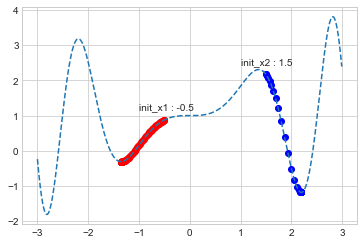

In [198]:
init_x1 = -0.5
x_log1,y_log1 = gradient_descent(f3,df_dx3,init_x1)
plt.scatter(x_log1,y_log1,color = 'r')

init_x2 = 1.5
x_log2,y_log2 = gradient_descent(f3,df_dx3,init_x2)

plt.scatter(x_log2,y_log2,color = 'b')

x = np.arange(-3,3,0.01)
plt.plot(x,f3(x),'--')

plt.scatter(init_x1,f3(init_x1),color='r')
plt.scatter(init_x2,f3(init_x2),color='b')
plt.text(init_x1-0.5, f3(init_x1)+0.3, 'init_x1 : {}'.format(init_x1),fontsize = 10)
plt.text(init_x2-0.5, f3(init_x2)+0.3, 'init_x2 : {}'.format(init_x2),fontsize = 10)
plt.show()

In [236]:
#횟수에 도달(더이상 변화가 생기지 않는 점) 하면 종료하는 gradient descent
def gradient_descent2(f,df_dx, init_x, lr = 0.01, epoch = 1000):
    eps = 1e-5 #입실론값
    count = 0

    old_x = init_x
    min_x = old_x
    min_y = f(min_x)

    x_log, y_log = [min_x],[min_y]
    for i in range(epoch):
        grad = df_dx(old_x)
        new_x = old_x - lr * grad
        new_y = f(new_x)

        if min_y > new_y:
            min_x = new_x
            min_y = new_y

        if np.abs(old_x - new_x) < eps:
            break
    
        x_log.append(old_x)
        y_log.append(f(new_x))

        old_x = new_x
        count += 1

    return x_log,y_log,count


count1 : 17
count2 : 113
count3 : 28


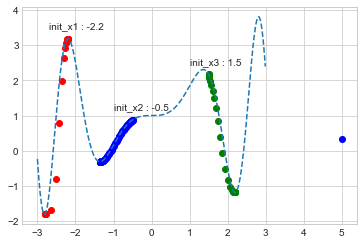

In [241]:
init_x1 = -2.2
x_log1, y_log1, count1 = gradient_descent2(f3,df_dx3,init_x1)
plt.scatter(x_log1,y_log1,color = 'r')
print('count1 :',count1)

init_x2 = -0.5
x_log2, y_log2, count2 = gradient_descent2(f3,df_dx3,init_x2)
plt.scatter(x_log2, y_log2, color = 'b')
print('count2 :',count2)

init_x3 = 1.5
x_log3, y_log3, count3 = gradient_descent2(f3,df_dx3,init_x3)
plt.scatter(x_log3,y_log3,color = 'g')
print('count3 :',count3)


x = np.arange(-3,3,0.01)
plt.plot(x,f3(x),'--')

plt.scatter(init_x1, f3(init_x1),color='r')
plt.text(init_x1-0.5, f3(init_x1)+0.3, 'init_x1 : {}'.format(init_x1),fontsize = 10)

plt.scatter(x_init2, f3(x_init2),color='b')
plt.text(init_x2-0.5, f3(init_x2)+0.3, 'init_x2 : {}'.format(init_x2),fontsize = 10)

plt.scatter(init_x3, f3(init_x3),color='g')
plt.text(init_x3-0.5, f3(init_x3)+0.3, 'init_x3 : {}'.format(init_x3),fontsize = 10)

plt.show()

#### 학습률이 크면 생기는 일

![](https://cdn-images-1.medium.com/freeze/max/1000/1*22oh44C5tUHbZ0yvIKWDFg.png)

init_value = 0.001, count = 1000
init_value = 0.01, count = 545
init_value = 0.1, count = 60
init_value = 0.99, count = 773


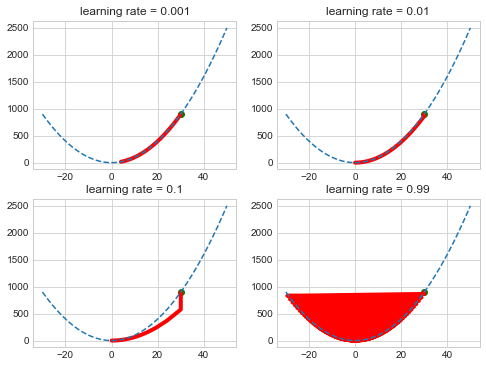

In [350]:
#학습률 별로 경사하강법 

lr_list = [0.001, 0.01, 0.1, 0.99]

init_x = 30.0
x = np.arange(-30,50,0.01)
fig = plt.figure(figsize=(8,6))

for i,lr in enumerate(lr_list):
    x_log, y_log, count = gradient_descent2(f1,df_dx1, init_x, lr)
    ax = fig.add_subplot(2,2,i+1)
    ax.scatter(init_x, f1(init_x), color = 'green')
    ax.plot(x_log, y_log, color = 'red', linewidth = '4')
    ax.plot(x,f1(x),'--')
    ax.title.set_text('learning rate = {}'.format(str(lr)))
    print('init_value = {}, count = {}'.format(str(lr),str(count)))

plt.show()